<a href="https://colab.research.google.com/github/IkramMaouche/Breast-Cancer-Metastasis-Prediction/blob/main/Breast_Cancer_Metastasis_Prediction_using_CS_CatBoot_and_LIME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
!zip -r /content/data.zip /content/data

  adding: content/data/ (stored 0%)
  adding: content/data/dfImputed.csv (deflated 91%)
  adding: content/data/y_test.csv (deflated 86%)
  adding: content/data/y_test_FS.csv (deflated 86%)
  adding: content/data/X_test.csv (deflated 87%)
  adding: content/data/y_train.csv (deflated 97%)
  adding: content/data/Database_Slaoui_Meriem_2.xlsx (deflated 8%)
  adding: content/data/df.csv (deflated 88%)
  adding: content/data/y_train_FS.csv (deflated 97%)
  adding: content/data/X_train_FS.csv (deflated 90%)
  adding: content/data/X_train.csv (deflated 90%)
  adding: content/data/X_test_FS.csv (deflated 88%)


In [107]:
from google.colab import files
files.download("/content/data.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
pip install scikit-learn==1.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 21.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [3]:
pip install missingpy==0.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 2.5 MB/s eta 0:00:00


In [4]:
pip install scikit-plot==0.3.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
pip install xgboost==0.90

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 MB 6.9 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.7.5
    Uninstalling xgboost-1.7.5:
      Successfully uninstalled xgboost-1.7.5


In [6]:
pip install lightgbm==2.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.3 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 3.3.5
    Uninstalling lightgbm-3.3.5:
      Successfully uninstalled lightgbm-3.3.5


In [7]:
pip install catboost==1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
pip install deap==1.3.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 4.6 MB/s eta 0:00:00


In [9]:
pip install lime==0.2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=62c0123b7a57560976e73a8624af8b5ffee4813560a32db5dc440bf20458e8f4
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

from collections import Counter

import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from imblearn.under_sampling import EditedNearestNeighbours

from deap import tools
from deap import algorithms
from deap import base
from deap import creator
from deap import tools

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix,classification_report,f1_score

from xgboost import XGBClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import Pool, CatBoostClassifier

import joblib
import random

import lime
from lime import lime_tabular

# Data loading

In [13]:
# read the data from excel file and define 'unknown' as NaN values
df = pd.read_excel("data/Database_Slaoui_Meriem_2.xlsx", index_col=0, na_values=['', 'unknown'])

# Preview the first 5 lines of the loaded data 
#print(df.head())

# Delete rows where OUTCOME is unknown 
df.dropna(subset = ['progression'], inplace=True)
#print("drop progression ",df.shape)

# Delete  columns with missing values > 80%
df.drop(['Metastatic disease'], axis='columns', inplace=True)

df = df[df.Obesity.isnull() & df['Familial history of breast cancer'].isnull() & df.progression == 0]
#print(df.shape)

#change 0 and 1 into string so that we do not get confused with labeled values
df['Number of full term pregnancies'] = df['Number of full term pregnancies'].replace(0,'zero')
df['Number of full term pregnancies'] = df['Number of full term pregnancies'].replace(1,'one')


#create data dictionary for labeling
d = [{'≤40y': 0, '˃40y': 1},
     {'no': 0, 'yes': 1},
     {'zero': 0, 'one': 1, '2 to 4' : 2, '5 or more' : 3},
     {'negative': 0, 'positive': 1},
     {'T1': 0, 'T2': 1, 'T3': 2},
     {'N0': 0, 'N1': 1, 'N2': 2, 'N3': 3},

     {'sarcoma': 0, 'tubular carcinoma': 1, 'invasive carcinoma of no special type': 2,
     'carcinoma with medullary features': 3, 'Invasive papillary carcinoma': 4,
     'invasive lobular carcinoma': 5, 'Ductal carcinoma in situ': 6,
     'angiosarcoma': 7, 'invasive mucinous carcinoma': 8,
     'inflammatory carcinoma': 9, 'metaplastic carcinoma of NST': 10,
     'carcinoma with neuroendocrine features': 11, 'Mixed invasive NST and special type': 12},
     
     {'SBR I': 0, 'SBR II': 1, 'SBR III': 2},

     {'conservative' : 0, 'radical mastectomy' : 1},
     
     {'no' : 0, 'metastasis/relapse' : 1}]

#label the data according to the dictionary
df['Age']= df['Age'].map(d[0]).fillna(df['Age'])
df['Nulliparity']= df['Nulliparity'].map(d[1]).fillna(df['Nulliparity'])
df['Oral contraception use']= df['Oral contraception use'].map(d[1]).fillna(df['Oral contraception use'])
df['Menopause']= df['Menopause'].map(d[1]).fillna(df['Menopause'])
df['Familial history of breast cancer']= df['Familial history of breast cancer'].map(d[1]).fillna(df['Familial history of breast cancer'])
df['Number of full term pregnancies']= df['Number of full term pregnancies'].map(d[2]).fillna(df['Number of full term pregnancies'])
df['Obesity']= df['Obesity'].map(d[1]).fillna(df['Obesity'])
df['ER']= df['ER'].map(d[3]).fillna(df['ER'])
df['PR']= df['PR'].map(d[3]).fillna(df['PR'])
df['HER2']= df['HER2'].map(d[3]).fillna(df['HER2'])
df['Tumor size']= df['Tumor size'].map(d[4]).fillna(df['Tumor size'])
df['Lymph nodes']= df['Lymph nodes'].map(d[5]).fillna(df['Lymph nodes'])
df['Histological type']= df['Histological type'].map(d[6]).fillna(df['Histological type'])
df['Vascular invasion']= df['Vascular invasion'].map(d[1]).fillna(df['Vascular invasion'])
df['SBR grade']= df['SBR grade'].map(d[7]).fillna(df['SBR grade'])
df['Surgery type']= df['Surgery type'].map(d[8]).fillna(df['Surgery type'])
df['Adjuvant Chemotherapy']= df['Adjuvant Chemotherapy'].map(d[1]).fillna(df['Adjuvant Chemotherapy'])
df['Radiotherapy']= df['Radiotherapy'].map(d[1]).fillna(df['Radiotherapy'])
df['Trastuzumab']= df['Trastuzumab'].map(d[1]).fillna(df['Trastuzumab'])
df['Hormone Therapy']= df['Hormone Therapy'].map(d[1]).fillna(df['Hormone Therapy'])
df['progression']= df['progression'].map(d[9]).fillna(df['progression'])

#save labeled data
df.to_csv('data/df.csv', index = False)

#Imputation

In [14]:
df = pd.read_csv('data/df.csv')

# get indices of categorical features
cat_cols_ind = [df.columns.get_loc(col) for col in df.columns.tolist()]
# drop index of output column
cat_cols_ind.pop()

# perform the imputation
imputer = MissForest()
df_imputed = imputer.fit_transform(df, cat_vars=cat_cols_ind)

#trandform imputed data to dataframe
df = pd.DataFrame(df_imputed, columns= list(df.columns.values))

for col in cat_cols_ind:
    df.iloc[:,col] = df.iloc[:,col].astype('category')

df.to_csv('data/dfImputed.csv', index = False)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


# Data splitting and Undersampling

In [15]:
df = pd.read_csv('data/dfImputed.csv')

Y = pd.DataFrame(df['progression'], columns = ['progression'])
X = df.drop(['progression'], axis='columns', inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)#, stratify=Y

X_train = pd.DataFrame(X_train, columns= list(X.columns.values))
X_test = pd.DataFrame(X_test, columns= list(X.columns.values))
y_train = pd.DataFrame(y_train, columns= ['progression'])
y_test = pd.DataFrame(y_test, columns= ['progression'])

In [16]:
#---------------------------------------------------  Undersampling the majority class in the train set  -------------------------------------------------

# summarize distribution
counter = Counter(y_train['progression'].values.tolist())
print(counter)

enn = EditedNearestNeighbours(n_neighbors=4) #, ratio='majority', return_indices=False
X_train, y_train = enn.fit_resample(X_train, y_train)

# summarize distribution
counter = Counter(y_train['progression'].values.tolist())
print(counter)
#-----------------------------------------------------------------------------------------------------------------------------------------

X_train.to_csv("data/X_train.csv", index = False)
y_train.to_csv("data/y_train.csv", index = False)
X_test.to_csv("data/X_test.csv", index = False)
y_test.to_csv("data/y_test.csv", index = False)


Counter({0.0: 236, 1.0: 77})
Counter({0.0: 138, 1.0: 77})


# Fature selection

In [56]:
X_train = pd.read_csv("data/X_train.csv")
y_train = pd.read_csv("data/y_train.csv")
X_test  = pd.read_csv("data/X_test.csv")
y_test  = pd.read_csv("data/y_test.csv")

In [18]:
class Patient:
    """This class encapsulates the test for the classifier
    """

    NUM_FOLDS = 5

    def __init__(self, randomSeed):
        """
        :param randomSeed: random seed value used for reproducible results
        """
        self.randomSeed = randomSeed

        # separate to input features and resulting category (last column):
        self.X = X_train
        self.y = y_train

        # split the data, creating a group of training/validation sets to be used in the k-fold validation process:
        self.kfold = KFold(n_splits=self.NUM_FOLDS)

        self.classifier = RandomForestClassifier(random_state=self.randomSeed)

    def __len__(self):
        """
        :return: the total number of features used in this classification problem
        """
        return self.X.shape[1]

    def getMeanF1score(self, zeroOneList):
        """
        returns the mean F1-score measure of the calssifier, calculated using k-fold validation process,
        using the features selected by the zeroOneList
        :param zeroOneList: a list of binary values corresponding the features in the dataset. A value of '1'
        represents selecting the corresponding feature, while a value of '0' means that the feature is dropped.
        :return: the mean F1-score measure of the calssifier when using the features selected by the zeroOneList
        """

        # from X_train, drop the columns that correspond to the unselected features:
        zeroIndices = [i for i, n in enumerate(zeroOneList) if n == 0]
        currentX = self.X.drop(self.X.columns[zeroIndices], axis=1)

        # perform k-fold validation and determine the f1score measure of the classifier:
        cv_results = cross_val_score(self.classifier, currentX, self.y, cv=self.kfold, scoring='f1')

        # return mean F1-score:
        return cv_results.mean()

# testing the class:
def main():
    # create a problem instance:
    patient = Patient(randomSeed=42)

    #getting the F1-score when all features are used:
    allOnes = [1] * len(patient)
    print("-- All features selected: ", allOnes, ", F1 score = ", patient.getMeanF1score(allOnes))

if __name__ == "__main__":
    main()

-- All features selected:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] , F1 score =  0.2633846153846154


In [ ]:
def eaSimpleWithElitism(population, toolbox, cxpb, mutpb, ngen, stats=None,
             halloffame=None, verbose=__debug__):
    """This algorithm is similar to DEAP eaSimple() algorithm, with the modification that
    halloffame is used to implement an elitism mechanism. The individuals contained in the
    halloffame are directly injected into the next generation and are not subject to the
    genetic operators of selection, crossover and mutation.
    """
    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is None:
        raise ValueError("halloffame parameter must not be empty!")

    halloffame.update(population)
    hof_size = len(halloffame.items) if halloffame.items else 0

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)

    # Begin the generational process
    for gen in range(1, ngen + 1):

        # Select the next generation individuals
        offspring = toolbox.select(population, len(population) - hof_size)

        # Vary the pool of individuals with cross and mutation
        offspring = algorithms.varAnd(offspring, toolbox, cxpb, mutpb)
        #print(offspring)

        
        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # add the best back to population:
        offspring.extend(halloffame.items)

        # Update the hall of fame with the generated individuals
        halloffame.update(offspring)

        # Replace the current population by the offspring
        population[:] = offspring

        # Append the current generation statistics to the logbook
        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print(logbook.stream)

    return population, logbook

In [ ]:
# Genetic Algorithm parameters:
POPULATION_SIZE = 50
P_CROSSOVER = 0.8  # probability for crossover
P_MUTATION = 0.05   # probability for mutating an individual
MAX_GENERATIONS = 100
HALL_OF_FAME_SIZE = 10 # number of best selected individuals that will pass to the next generation

TREAT_PENALTY_FACTOR = 0.003 #penalty of not selecting treatment
FEATURE_PENALTY_FACTOR = 0.001 #penalty of not selecting a characteristic

# set the random seed:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

# create the Patient test class:
patient = Patient(RANDOM_SEED)

# generate random ensemble of characteristics for the patient
# (exclusing the four treatment characteristics because we will 
# initialize the individual with all treatments present)
def randomm(): 
  list=[]
  for i in range(len(patient)-4):
    list.append(random.randint(0,1))

  return list


# ---------- fitness calculation --------------------------------
def patientClassificationf1score(individual):
    
    # number of treatments present in the individual/patient
    numTreatUsed = sum(individual[-4:])
    
    # number of characteristics present in the individual/patient
    numFeaturesUsed = sum(individual)

    # calculate f1-score of the individual
    f1score = patient.getMeanF1score(individual)
    
    # return the fitness value of the individual
    return f1score - (FEATURE_PENALTY_FACTOR * (len(patient) - numFeaturesUsed) + TREAT_PENALTY_FACTOR * (4-numTreatUsed)),  # return a tuple



toolbox = base.Toolbox()

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMax)

# create the individual operator to fill up an Individual instance which have random characteristics in addition to all four treatment features:
toolbox.register("individualCreator", creator.Individual, randomm()+[1,1,1,1])

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

toolbox.register("evaluate", patientClassificationf1score)

# Tournament selection with tournament size of 2:
toolbox.register("select", tools.selTournament, tournsize=3)

# Single-point crossover:
toolbox.register("mate", tools.cxTwoPoint)

# Flip-bit mutation:
# indpb: Independent probability for each attribute to be flipped
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/len(patient))

X_best = []

# Genetic Algorithm flow:
def main():

    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("max", np.max)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # perform the Genetic Algorithm flow with hof feature added:
    population, logbook = eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                                      ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

    # print best solution found:
    print("- Best solutions are:")
    for i in range(HALL_OF_FAME_SIZE):
        print(i, ": ", hof.items[i], 
              ", fitness = ", hof.items[i].fitness.values[0],
              ", F1-score = ", patient.getMeanF1score(hof.items[i]), 
              ", features = ", sum(hof.items[i]),
              ", features set = ",  [list(X_train)[j] for j in range(
                                    len(hof.items[i])) if hof.items[i][j] == 1])

    X_best.append(hof.items)

    print(hof.items)

    # extract statistics:
    maxFitnessValues, meanFitnessValues, minFitnessValues = logbook.select("max", "avg", "min")

    fig, ax = plt.subplots()

    # plot statistics:
    sns.set_style("whitegrid")
    line1 = plt.plot(maxFitnessValues, color='red', label="Maximum Fitness")
    line2 = plt.plot(meanFitnessValues, color='orange', label="Average Fitness")
    line3 = plt.plot(minFitnessValues, color='green', label="Minimum Fitness")
    plt.xlabel('Generation')
    plt.ylabel('Min / Average / Max  Fitness')
    plt.title('Min, Average and Max fitness over Generations')

    lns = line1 + line2 + line3
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc="top left")
    plt.savefig("figures/geneticEvolution.pdf", dpi=1200)
    plt.show()

if __name__ == "__main__":
    main()

In [57]:
#manually get the result of running Genetic Algorithm for feature selection
# return best 5 individuals
X_best = [[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]]

In [58]:
X_GA = X_best[0]
X_train = X_train[[list(X_train)[j] for j in range(len(X_GA)) if X_GA[j] == 1]]
X_test = X_test[[list(X_test)[j] for j in range(len(X_GA)) if X_GA[j] == 1]]               

#save the data after feature selection
X_train.to_csv("data/X_train_FS.csv", index = False)
y_train.to_csv("data/y_train_FS.csv", index = False)
X_test.to_csv("data/X_test_FS.csv", index = False)
y_test.to_csv("data/y_test_FS.csv", index = False)

# LR, DT, KNN Classification

In [65]:
X_train = pd.read_csv("data/X_train_FS.csv")
y_train = pd.read_csv("data/y_train_FS.csv")
X_test  = pd.read_csv("data/X_test_FS.csv")
y_test  = pd.read_csv("data/y_test_FS.csv")

In [66]:
# fit model with training data
model= LogisticRegression() 
model.fit(X_train,y_train)

# make predictions for test data
y_pred = model.predict(X_test)

# evaluate predictions
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'precision score: {precision_score(y_test,y_pred)}')
print(f'f1 score: {f1_score(y_test,y_pred)}')
print(classification_report(y_test,y_pred))
print('\n\n')

#joblib.dump(model, 'models/LR.pkl'.format("w"), compress = 1)

Accuracy Score: 0.7468354430379747
Recall score: 0.47619047619047616
precision score: 0.5263157894736842
f1 score: 0.5
              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83        58
         1.0       0.53      0.48      0.50        21

    accuracy                           0.75        79
   macro avg       0.67      0.66      0.67        79
weighted avg       0.74      0.75      0.74        79






['models/LR.pkl']

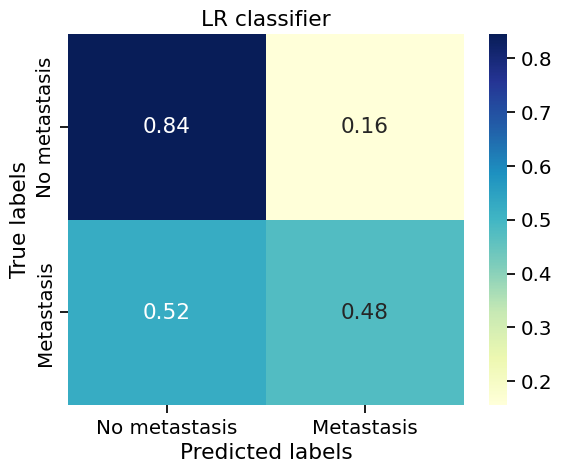

In [100]:
# load the model
loaded_model = joblib.load(open('models/LR.pkl', 'rb'))
y_pred = loaded_model.predict(X_test)

#plot confusion matrix
sns.set_context("notebook", font_scale=1.3)
disp = confusion_matrix(y_test, y_pred, normalize='true') 

plt.figure(figsize = (6,5))
ax = sns.heatmap(disp, annot=True, fmt='.2g', cmap='YlGnBu', cbar='False')

# labels, title and ticks
ax.set_title('LR classifier')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['No metastasis', 'Metastasis'])
ax.yaxis.set_ticklabels(['No metastasis', 'Metastasis'])

plt.tight_layout()
plt.savefig("figures/LR.pdf",dpi=1200)
plt.show()

In [70]:
# fit model with training data
model = DecisionTreeClassifier() 
model.fit(X_train,y_train)

# make predictions for test data
y_pred = model.predict(X_test)

# evaluate predictions
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'precision score: {precision_score(y_test,y_pred)}')
print(f'f1 score: {f1_score(y_test,y_pred)}')
print(classification_report(y_test,y_pred))
print('\n\n')

#joblib.dump(model, 'models/DT.pkl'.format("w"), compress = 1)

Accuracy Score: 0.6455696202531646
Recall score: 0.5714285714285714
precision score: 0.3870967741935484
f1 score: 0.4615384615384615
              precision    recall  f1-score   support

         0.0       0.81      0.67      0.74        58
         1.0       0.39      0.57      0.46        21

    accuracy                           0.65        79
   macro avg       0.60      0.62      0.60        79
weighted avg       0.70      0.65      0.66        79






['models/DT.pkl']

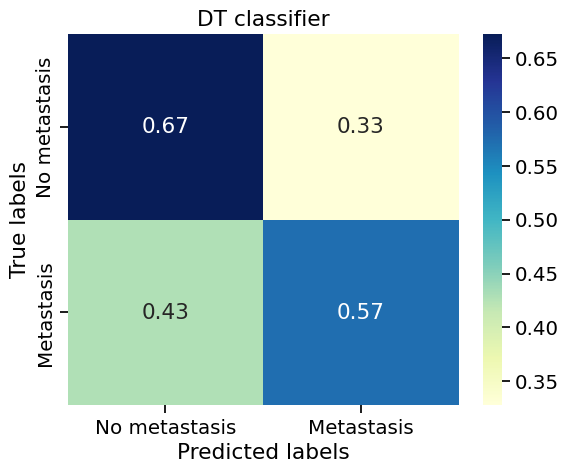

In [75]:
# load the model
loaded_model = joblib.load(open('models/DT.pkl', 'rb'))
y_pred = loaded_model.predict(X_test)

#plot confusion matrix
sns.set_context("notebook", font_scale=1.3)
disp = confusion_matrix(y_test, y_pred, normalize='true') 

plt.figure(figsize = (6,5))
ax = sns.heatmap(disp, annot=True, fmt='.2g', cmap='YlGnBu', cbar='False')

# labels, title and ticks
ax.set_title('DT classifier')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['No metastasis', 'Metastasis'])
ax.yaxis.set_ticklabels(['No metastasis', 'Metastasis'])

plt.tight_layout()
plt.savefig("figures/DT.pdf",dpi=1200)
plt.show()

In [72]:
# fit model with training data
model = KNeighborsClassifier(n_neighbors=5, metric="hamming") 
model.fit(X_train,y_train)

# make predictions for test data
y_pred = model.predict(X_test)

# evaluate predictions
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'precision score: {precision_score(y_test,y_pred)}')
print(f'f1 score: {f1_score(y_test,y_pred)}')
print(classification_report(y_test,y_pred))
print('\n\n')

#joblib.dump(model, 'models/KNN.pkl'.format("w"), compress = 1)

Accuracy Score: 0.6835443037974683
Recall score: 0.3333333333333333
precision score: 0.3888888888888889
f1 score: 0.358974358974359
              precision    recall  f1-score   support

         0.0       0.77      0.81      0.79        58
         1.0       0.39      0.33      0.36        21

    accuracy                           0.68        79
   macro avg       0.58      0.57      0.57        79
weighted avg       0.67      0.68      0.68        79






['models/KNN.pkl']

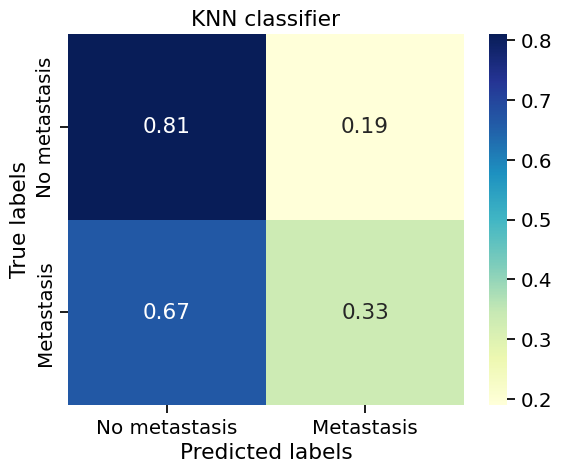

In [74]:
# load the model
loaded_model = joblib.load(open('models/KNN.pkl', 'rb'))
y_pred = loaded_model.predict(X_test)

#plot confusion matrix
sns.set_context("notebook", font_scale=1.3)
disp = confusion_matrix(y_test, y_pred, normalize='true') 

plt.figure(figsize = (6,5))
ax = sns.heatmap(disp, annot=True, fmt='.2g', cmap='YlGnBu', cbar='False')

# labels, title and ticks
ax.set_title('KNN classifier')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['No metastasis', 'Metastasis'])
ax.yaxis.set_ticklabels(['No metastasis', 'Metastasis'])

plt.tight_layout()
plt.savefig("figures/KNN.pdf",dpi=1200)
plt.show()

# Cost insensitive classification

In [78]:
X_train = pd.read_csv("data/X_train_FS.csv")
y_train = pd.read_csv("data/y_train_FS.csv")
X_test  = pd.read_csv("data/X_test_FS.csv")
y_test  = pd.read_csv("data/y_test_FS.csv")

In [79]:
# fit model with training data
model = XGBClassifier()
model.fit(X_train,y_train)

# make predictions for test data
y_pred = model.predict(X_test)

# evaluate predictions
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'precision score: {precision_score(y_test,y_pred)}')
print(f'f1 score: {f1_score(y_test,y_pred)}')
print(classification_report(y_test,y_pred))
print('\n\n')

#joblib.dump(model, 'models/XGBoost.pkl'.format("w"), compress = 1)

Accuracy Score: 0.7341772151898734
Recall score: 0.6190476190476191
precision score: 0.5
f1 score: 0.5531914893617021
              precision    recall  f1-score   support

         0.0       0.85      0.78      0.81        58
         1.0       0.50      0.62      0.55        21

    accuracy                           0.73        79
   macro avg       0.67      0.70      0.68        79
weighted avg       0.76      0.73      0.74        79






['models/XGBoost.pkl']

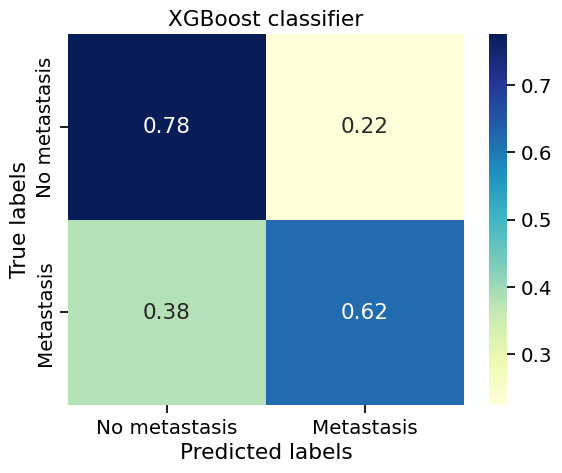

In [80]:
# load the model
loaded_model = joblib.load(open('models/XGBoost.pkl', 'rb'))
y_pred = loaded_model.predict(X_test)

#plot confusion matrix
sns.set_context("notebook", font_scale=1.3)
disp = confusion_matrix(y_test, y_pred, normalize='true') 

plt.figure(figsize = (6,5))
ax = sns.heatmap(disp, annot=True, fmt='.2g', cmap='YlGnBu', cbar='False')

# labels, title and ticks
ax.set_title('XGBoost classifier')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['No metastasis', 'Metastasis'])
ax.yaxis.set_ticklabels(['No metastasis', 'Metastasis'])

plt.tight_layout()
plt.savefig("figures/XGBoost.pdf",dpi=1200)
plt.show()

In [81]:
X_train = X_train.astype(int, copy=False)
X_test = X_test.astype(int, copy=False)

# fit model with training data
model = lgb.LGBMClassifier() 
model.fit(X_train,y_train, verbose=False)

# make predictions for test data
y_pred = model.predict(X_test)

# evaluate predictions
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'precision score: {precision_score(y_test,y_pred)}')
print(f'f1 score: {f1_score(y_test,y_pred)}')
print(classification_report(y_test,y_pred))
print('\n\n')

#joblib.dump(model, 'models/LightGBM.pkl'.format("w"), compress = 1)

Accuracy Score: 0.7468354430379747
Recall score: 0.5238095238095238
precision score: 0.5238095238095238
f1 score: 0.5238095238095238
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83        58
         1.0       0.52      0.52      0.52        21

    accuracy                           0.75        79
   macro avg       0.68      0.68      0.68        79
weighted avg       0.75      0.75      0.75        79






['models/LightGBM.pkl']

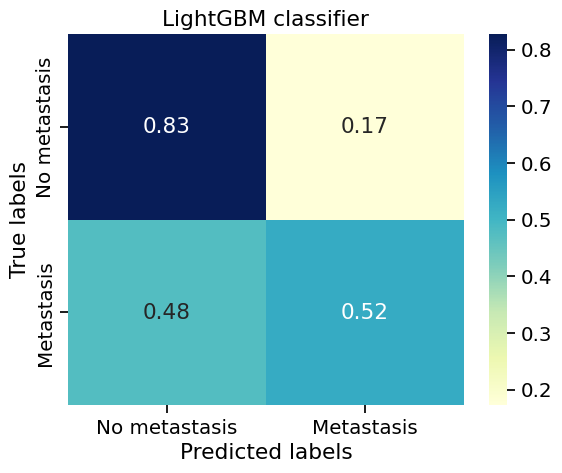

In [82]:
# load the model
loaded_model = joblib.load(open('models/LightGBM.pkl', 'rb'))

y_pred = loaded_model.predict(X_test)

#plot confusion matrix
sns.set_context("notebook", font_scale=1.3)
disp = confusion_matrix(y_test, y_pred, normalize='true') 

plt.figure(figsize = (6,5))
ax = sns.heatmap(disp, annot=True, fmt='.2g', cmap='YlGnBu', cbar='False')

# labels, title and ticks
ax.set_title('LightGBM classifier')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['No metastasis', 'Metastasis'])
ax.yaxis.set_ticklabels(['No metastasis', 'Metastasis'])

plt.tight_layout()
plt.savefig("figures/LightGBM.pdf",dpi=1200)
plt.show()

In [83]:
X_train = X_train.astype(int, copy=False)
X_test = X_test.astype(int, copy=False)

model = CatBoostClassifier() 
model.fit(X_train,y_train, cat_features=list(range(0, X_train.shape[1])), verbose=False)
y_pred = model.predict(X_test)

print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'precision score: {precision_score(y_test,y_pred)}')
print(f'f1 score: {f1_score(y_test,y_pred)}')
print(classification_report(y_test,y_pred))
print('\n\n')

#joblib.dump(model, 'models/CatBoost.pkl'.format("w"), compress = 1)

Accuracy Score: 0.7848101265822784
Recall score: 0.42857142857142855
precision score: 0.6428571428571429
f1 score: 0.5142857142857143
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86        58
         1.0       0.64      0.43      0.51        21

    accuracy                           0.78        79
   macro avg       0.73      0.67      0.69        79
weighted avg       0.77      0.78      0.77        79






['models/CatBoost.pkl']

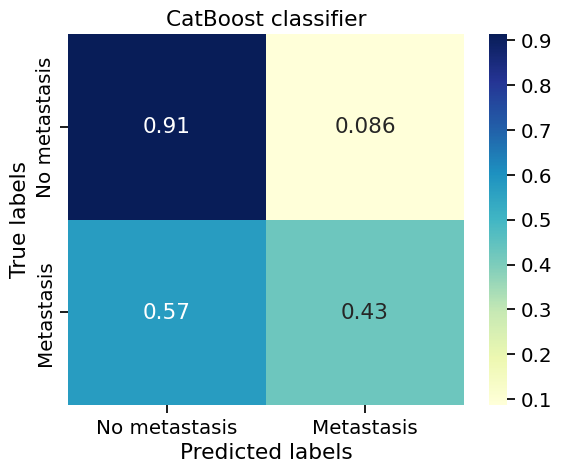

In [84]:
# load the model
loaded_model = joblib.load(open('models/CatBoost.pkl', 'rb'))
y_pred = loaded_model.predict(X_test)


sns.set_context("notebook", font_scale=1.3)
disp = confusion_matrix(y_test, y_pred, normalize='true') 

plt.figure(figsize = (6,5))
ax = sns.heatmap(disp, annot=True, fmt='.2g', cmap='YlGnBu', cbar='False')

# labels, title and ticks
ax.set_title('CatBoost classifier')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['No metastasis', 'Metastasis'])
ax.yaxis.set_ticklabels(['No metastasis', 'Metastasis'])
plt.tight_layout()

plt.savefig("figures/CatBoost.pdf",dpi=1200)
plt.show()

# Cost sensitive classification

In [85]:
X_train = pd.read_csv("data/X_train_FS.csv")
y_train = pd.read_csv("data/y_train_FS.csv")
X_test = pd.read_csv("data/X_test_FS.csv")
y_test = pd.read_csv("data/y_test_FS.csv")

# CS-XGBoost

In [86]:
dtrain = xgb.DMatrix(X_train, y_train)

def custom_loss(y, y_hat):
    y = dtrain.get_label()
    p = y_hat
    beta=2
    grad = (beta-1) * p * y + p - beta * y
    hess = ((beta-1) * y + 1) * (p * (1.0 - p))

    return grad, hess

def custom_eval(beta, y, y_hat):
    p =  1.0 / (1.0 + np.exp(-y_hat))

    loss_fn = y*np.log(p)
    #print(loss_fn)
    loss_fp = (1 - y)*np.log(1.0 - p)
    #print(loss_fp)
    print(np.sum(-(beta*loss_fn+loss_fp))/len(y))
    return 'error val', np.sum(-(beta*loss_fn+loss_fp))/len(y), True 


xgb_params = {
        'n_jobs': -1,
        'objective': custom_loss,
        'metric': custom_eval,
    }

# fit model with training data
model = xgb.XGBClassifier(**xgb_params)
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)

# evaluate predictions
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'precision score: {precision_score(y_test,y_pred)}')
print(f'f1 score: {f1_score(y_test,y_pred)}')
print(classification_report(y_test,y_pred))
print('\n\n')

#joblib.dump(model, 'models/CS-XGBoost.pkl'.format("w"), compress = 1)

Accuracy Score: 0.7088607594936709
Recall score: 0.5714285714285714
precision score: 0.46153846153846156
f1 score: 0.5106382978723405
              precision    recall  f1-score   support

         0.0       0.83      0.76      0.79        58
         1.0       0.46      0.57      0.51        21

    accuracy                           0.71        79
   macro avg       0.65      0.67      0.65        79
weighted avg       0.73      0.71      0.72        79






['models/CS-XGBoost.pkl']

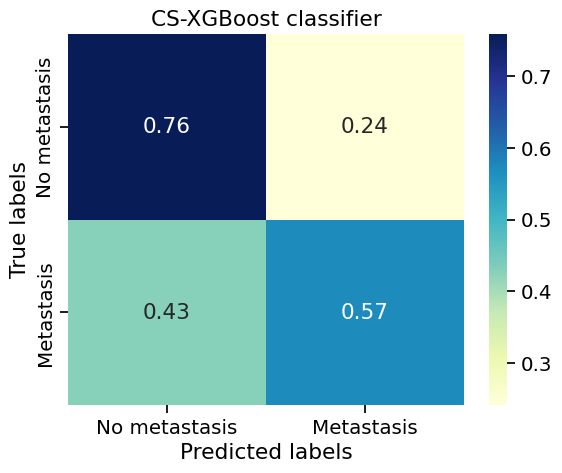

In [87]:
# load the model
loaded_model = joblib.load(open('models/CS-XGBoost.pkl', 'rb'))
y_pred = loaded_model.predict(X_test)

#plot confusion matrix
sns.set_context("notebook", font_scale=1.3)
disp = confusion_matrix(y_test, y_pred, normalize='true') 

plt.figure(figsize = (6,5))
ax = sns.heatmap(disp, annot=True, fmt='.2g', cmap='YlGnBu', cbar='False')

# labels, title and ticks
ax.set_title('CS-XGBoost classifier')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['No metastasis', 'Metastasis'])
ax.yaxis.set_ticklabels(['No metastasis', 'Metastasis'])

plt.tight_layout()
plt.savefig("figures/CS-XGBoost.pdf",dpi=600)
plt.show()

# CS-LightGBM

In [88]:
beta=2

def custom_loss(y, y_hat):

    p = 1.0 / (1.0 + np.exp(-y_hat))
    grad = (beta-1) * p * y + p - beta * y
    hess = ((beta-1) * y + 1) * (p * (1.0 - p))

    return grad, hess

def custom_eval(y, y_hat):

    p =  1.0 / (1.0 + np.exp(-y_hat))

    loss_fn = y*np.log(p)
    loss_fp = (1 - y)*np.log(1.0 - p)
    
    return 'error val', np.sum(-(beta*loss_fn+loss_fp))/len(y), True 


lgb_tr = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_test, y_test)

# fit model with training data
model = lgb.LGBMClassifier(objective=custom_loss)
model.fit(X_train, y_train, eval_set=(X_test, y_test), eval_metric=custom_eval, verbose=0)

# make predictions for test data
predictions = model.predict(X_test)
y_pred = [np.round(value) for value in predictions]

# evaluate predictions
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'precision score: {precision_score(y_test,y_pred)}')
print(f'f1 score: {f1_score(y_test,y_pred)}')
print(classification_report(y_test,y_pred))
print('\n\n')

#joblib.dump(model, 'models/CS-LightGBM.pkl'.format("w"), compress = 1)

Accuracy Score: 0.759493670886076
Recall score: 0.5714285714285714
precision score: 0.5454545454545454
f1 score: 0.5581395348837208
              precision    recall  f1-score   support

         0.0       0.84      0.83      0.83        58
         1.0       0.55      0.57      0.56        21

    accuracy                           0.76        79
   macro avg       0.69      0.70      0.70        79
weighted avg       0.76      0.76      0.76        79






['models/CS-LightGBM.pkl']

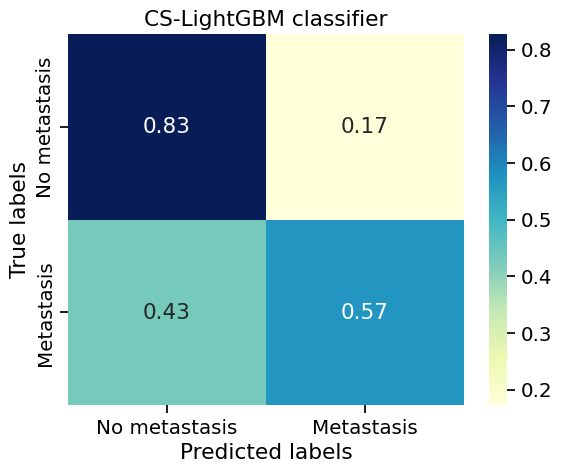

In [89]:
# load the model
loaded_model = joblib.load(open('models/CS-LightGBM.pkl', 'rb'))
y_pred = loaded_model.predict(X_test)
sns.set_context("notebook", font_scale=1.3)
disp = confusion_matrix(y_test, y_pred, normalize='true') 

#plot confusion matrix
plt.figure(figsize = (6,5))
ax = sns.heatmap(disp, annot=True, fmt='.2g', cmap='YlGnBu', cbar='False')

# labels, title and ticks
ax.set_title('CS-LightGBM classifier')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['No metastasis', 'Metastasis'])
ax.yaxis.set_ticklabels(['No metastasis', 'Metastasis'])

plt.tight_layout()
plt.savefig("figures/CS-LightGBM.pdf",dpi=1200)
plt.show()

# CS-CatBoost

In [90]:
#custumized loss function with cost beta
class LoglossObjective(object):

    def calc_ders_range(self, approxes, targets, weights): ############################################
        beta = 2.1

        """
        Computes first and second derivative of the loss function 
        with respect to the predicted value for each object.

        Parameters
        ----------
        approxes : indexed container of floats
            Current predictions for each object.

        targets : indexed container of floats
            Target values you provided with the dataset.

        weight : float, optional (default=None)
            Instance weight.

        Returns
        -------
            der1 : list-like object of float
            der2 : list-like object of float

        """
              
        result = []

        y_true = targets
        y_pred = approxes

        for index in range(len(y_pred)):
            e = np.exp(approxes[index])
            p = e / (1 + e)
            
            der1 = (beta-1) * p * y_true[index] + p - (beta)* y_true[index]
            der2 = ((beta-1) * y_true[index] + 1) * (p * (1.0 - p))

            result.append((der1, der2))

        return result      

#custumized eval function correspending to custumized loss function
class LoglossMetric(object):
    def get_final_error(self, error, weight):
        """
        Returns final value of metric based on error and weight.

        Parameters
        ----------
        error : float
            Sum of errors in all instances.
            
        weight : float
            Sum of weights of all instances.

        Returns
        -------
        metric value : float

        """
        return error / (weight + 1e-38)

    def is_max_optimal(self):
        """
        Returns whether great values of metric are better
        """
        return False

    def evaluate(self, approxes, target, weight):
        """
        Evaluates metric value.

        Parameters
        ----------
        approxes : list of indexed containers (containers with only __len__ and __getitem__ defined) of float
            Vectors of approx labels.

        targets : one dimensional indexed container of float
            Vectors of true labels.

        weights : one dimensional indexed container of float, optional (default=None)
            Weight for each instance.

        Returns
        -------
            weighted error : float
            total weight : float

        """
        assert len(approxes) == 1
        assert len(target) == len(approxes[0])
        
        approx = approxes[0]

        error_sum = 0.0
        weight_sum = 0.0

        for i in range(len(approx)):
            e = np.exp(approx[i])
            p = e / (1 + e)
            w = 1.0 if weight is None else weight[i]
            weight_sum += w
            error_sum += -w * (target[i] * np.log(p) + (1 - target[i]) * np.log(1 - p))

            return self.err_rate(approxes, target), 0 
   
    def err_rate(self, y_hat, y_true): 
        beta = 2.1

        y_pred = np.clip(y_hat, 10e-7, 1-10e-7)
        loss_fn = (beta)*y_true*np.log(y_pred)
        loss_fp = (1.0 - y_true)*np.log(1.0 - y_pred)
        
        return  np.sum(-(loss_fn+loss_fp))/len(y_true)
    

In [91]:
X_train = X_train.astype(int, copy=False)
X_test = X_test.astype(int, copy=False)

y_train = y_train.astype(int, copy=False)
y_test = y_test.astype(int, copy=False)

# fit model with training data
model = CatBoostClassifier(iterations=700, depth=1, bootstrap_type='Bayesian', leaf_estimation_method='Newton', 
                           loss_function=LoglossObjective(),eval_metric=LoglossMetric(), verbose=0) 
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test,y_test)])

# make predictions for test data
predictions = model.predict_proba(X_test)[:,1]
y_pred = [np.round(value) for value in predictions]

# evaluate predictions
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'precision score: {precision_score(y_test,y_pred)}')
print(f'f1 score: {f1_score(y_test,y_pred)}')
print(classification_report(y_test,y_pred))
print('\n\n')

#joblib.dump(model, 'CS-CatBoost.pkl'.format("w"), compress = 1)

Accuracy Score: 0.810126582278481
Recall score: 0.8095238095238095
precision score: 0.6071428571428571
f1 score: 0.6938775510204083
              precision    recall  f1-score   support

           0       0.92      0.81      0.86        58
           1       0.61      0.81      0.69        21

    accuracy                           0.81        79
   macro avg       0.76      0.81      0.78        79
weighted avg       0.84      0.81      0.82        79






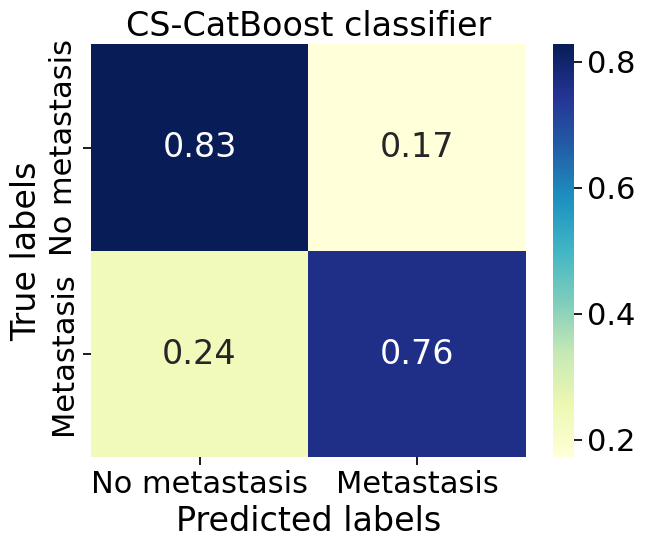

In [95]:
# load the model
loaded_model = joblib.load(open('models/CS-CatBoost.pkl', 'rb'))

# make predictions for test data
X_test = X_test.astype(int, copy=False)
predictions = loaded_model.predict_proba(X_test)[:,1]
y_pred = [np.round(value) for value in predictions]

#plot confusion matrix
sns.set_context("notebook", font_scale=2)
disp = confusion_matrix(y_test, y_pred, normalize='true') 

plt.figure(figsize = (7,6))
ax = sns.heatmap(disp, annot=True, fmt='.2g', cmap='YlGnBu', cbar='False')

# labels, title and ticks
ax.set_title('CS-CatBoost classifier')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['No metastasis', 'Metastasis'])
ax.yaxis.set_ticklabels(['No metastasis', 'Metastasis'])
plt.tight_layout()
plt.savefig("figures/CS-CatBoost.pdf",dpi=1200)
plt.show()

Test different beta values with CS-CatBoost and plot them

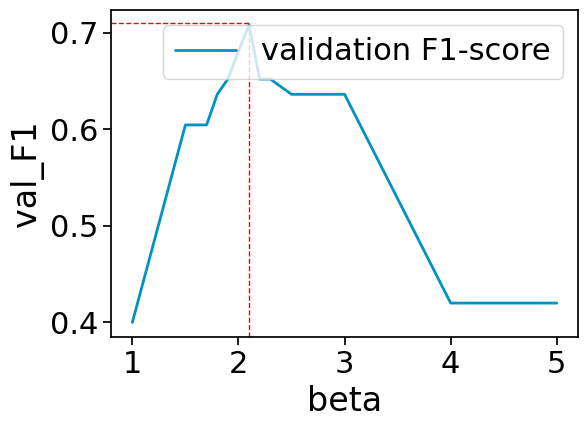

In [94]:
#we run the CS-CatBoost with different beta values and saved the loss and F1 score
beta = np.array([1,1.5,1.6,1.7,1.8,1.9,2,2.1,2.2,2.3,2.5,3,4,5])
val_loss = np.array([0.5829269153477675,0.578289535140304,0.5796824155202139,0.5891709467325428,0.5966460110690319,0.6083952057100382,0.6180693284303259,0.6283753125692059,0.6539834768176015,0.6716273767533728,0.6787199407279226,0.690866548931651,0.6992281833298204,0.700509245921143])
val_f1 = np.array([0.4,0.6046511627906977,0.6046511627906977,0.6046511627906977,0.6363636363636365,0.6521739130434783,0.6808510638297872,0.7083333333333334,0.6521739130434783,0.6521739130434783,0.6363636363636365,0.6363636363636365,0.41999999999999993,0.41999999999999993])

# convert to pandas dataframe
d = {'beta': beta, 'val_Logloss': val_loss, 'val_F1': val_f1}
plot_data = pd.DataFrame(d)

fig, ax1 = plt.subplots()

p = so.Plot(plot_data, x="beta")
p.add(so.Line(color="#0092C3", linewidth=2), y="val_F1").on(ax1).plot()
#p.add(so.Line(color="orange"), y="val_Logloss").on(ax2).plot()
plt.legend(labels=[ "validation F1-score"], loc ="upper right")

plt.axvline(2.1, 0,0.95, color="red", linestyle='--', linewidth=1)
plt.axhline(0.71, 0,0.3, color="red", linestyle='--', linewidth=1)
plt.tight_layout()
plt.savefig("figures/beta_choice.png", dpi=600)

# LOCAL EXPLANATION USING LIME

In [ ]:
#load the data
X_train = pd.read_csv("data/X_train_FS.csv")
y_train = pd.read_csv("data/y_train_FS.csv")
X_test  = pd.read_csv("data/X_test_FS.csv")
y_test  = pd.read_csv("data/y_test_FS.csv")

X_train[X_train.columns].astype('int')
X_test[X_train.columns].astype('int')

X_train1 = X_train.to_numpy()
X_test1 = X_test.to_numpy()
y_train1 = y_train.to_numpy()
y_test1 = y_test.to_numpy()

X_train[X_train.columns] = X_train[X_train.columns].astype('category')

# get indices of categorical features
cat_cols_ind = [X_train.columns.get_loc(col) for col in X_train.select_dtypes(['category']).columns.tolist()]

In [ ]:
#decode the labeled data into original values
categorical_names = '''0=≤40y,1=>40y
0=no,1=yes
0=no,1=yes
0=no,1=yes
0=no,1=yes
zero=0,one=1,2=2 to 4,3=≥5
0=no,1=yes
0=negative,1=positive
0=negative,1=positive
0=negative,1=positive
0=T1,1=T2,2=T3,99=99
0=N0,1=N1,2=N2,3=N3
0=sarcoma,1=tubular C.,2=I C. of NST,3=C. with medullary features,4=I. papillary C.,5=I.L.C.,6=D.C. in situ,7=angiosarcoma,8=I.M.C.,9=inflammatory C.,10=metaplastic C. of NST,11=C. with neuroendocrine features,12=Mixed I. NST and special type
0=no,1=yes
0=SBR I,1=SBR II,2=SBR III
0=conservative,1=radical mastectomy
0=no,1=yes
0=no,1=yes
0=no,1=yes
0=no,1=yes'''.split('\n')


#cat_names: a dict containing the values of each predictive variable in the set
cat_names={}

X_GA = [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]
index=0
for j, names in enumerate(categorical_names):
    if X_GA[j]==1:
        values = names.split(',')
        l=[]
        for x in values:
            l.append(x.split('=')[1])
        cat_names[index] = np.array(l)
        index=index+1

In [79]:
# load the model
loaded_model = joblib.load(open('models/CS-CatBoost.pkl', 'rb'))

# make predictions for test data
X_test = X_test.astype(int, copy=False)
predictions = model.predict_proba(X_test)[:,1]
y_pred = [np.round(value) for value in predictions]
y_pred = pd.DataFrame(y_pred, columns= ['progression'])

#get the index of a patiens with metastatic cancer predicted to have metastasis
while True:
    idx = random.randint(1, len(X_test)) 

    if y_test.iloc[idx][0] == 1 and y_pred.iloc[idx][0]==1:
        break


print('Patient number', (idx+1))
print("Prediction : ", y_pred.iloc[idx][0])
print("Actual :     ", y_test.iloc[idx][0])

#create lime explainer object
explainer = lime_tabular.LimeTabularExplainer(X_train1, mode="classification",
                                            class_names=['No metastasis', 'Metastasis'],
                                            feature_names= ['Age', 'Nulliparity', 'Oral contraception', 'Menopause',
                                                            'Fam hist of BC', 'N° full-term preg',
                                                            'Obesity', 'ER', 'PR', 'Tumor size', 'Histo',
                                                            'Vasc. inv.', 'grade', 'Surgery',
                                                            'Adj. ChemoT', 'RadioT', 'Trastuzumab',
                                                            'HormoneT'],
                                            categorical_features = cat_cols_ind,    
                                            categorical_names = cat_names                                 
                                            )
#explain the idx th instance
exp = explainer.explain_instance(X_test.iloc[idx], 
                                 loaded_model.predict_proba, 
                                 num_features=X_train.columns.size,
                                 distance_metric = 'hamming'
                                 )
exp.save_to_file('lime'+str(idx)+'.html')
exp.show_in_notebook(show_table=False)

Patient number 66
Prediction :  1.0
Actual :      1.0
